<img src='./images/ecmovimiento.png' width='300px' height='50px'>

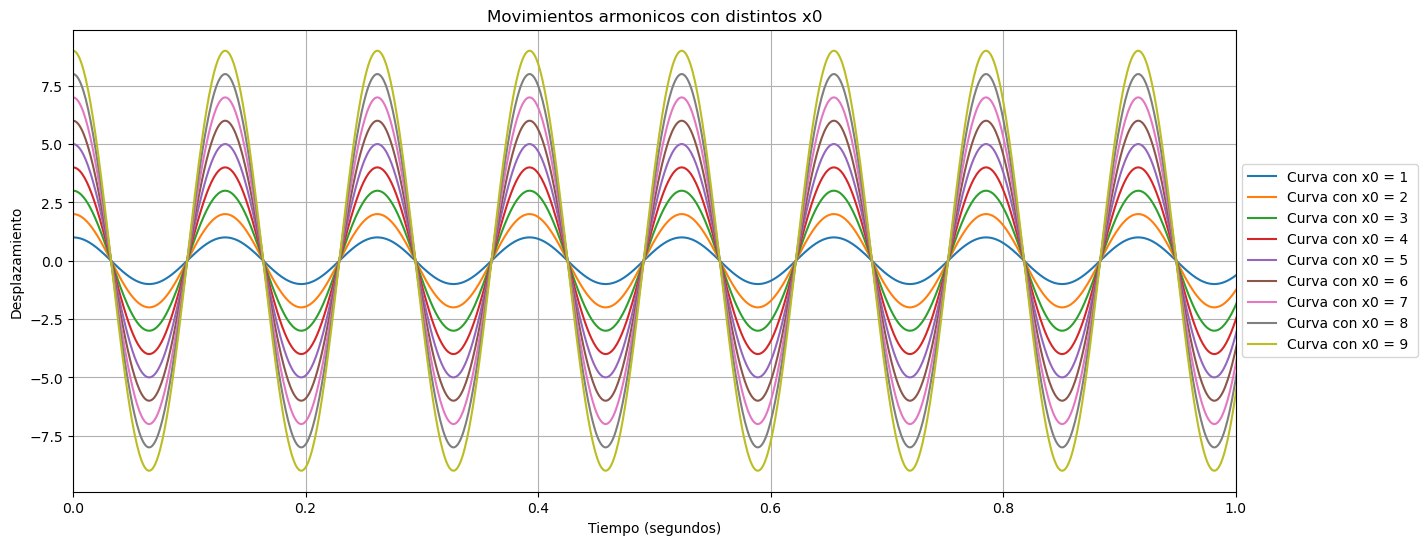

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.animation as animation

'''Calculo la respuesta de un sistema de un grado de libertad discreto conservativo'''

xvo = 0
w = 48
curvas = 10
salto = 0.001
tiempo = 100
f = w/(2*np.pi)
x = np.zeros((int(tiempo/salto),curvas))

for x0 in range(curvas):
    j = 0
    for t in np.arange(0, tiempo, salto):
        x[j,0] = t
        x[j,x0] = (x0*np.cos(w*t)) + (xvo*np.sin(w*t)/w)
        j+=1
    

# tbl_x = pd.DataFrame(x)
# display(tbl_x.style.set_caption('x'))

#Graficar todas las curvas
plt.figure(figsize=(15, 6))

for x0 in range(1,curvas):
    plt.plot(x[:,0], x[:,x0], label=f'Curva con x0 = {x0} ')

plt.xlabel('Tiempo (segundos)')
plt.ylabel('Desplazamiento')
plt.title('Movimientos armonicos con distintos x0')
plt.legend()
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlim(0, 1)
plt.grid(True)
plt.show()

In [12]:
# Crear una figura y un eje para la animación
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_xlim(0, 0.5)
ax.set_ylim(-12, 12)  # Ajusta los límites de acuerdo a tus datos

# Inicializa las líneas para las curvas
lines = []
for x0 in range(1, curvas):
    line, = ax.plot([], [], label=f'Curva con x0 = {x0}')
    lines.append(line)

# Función de inicialización
def init():
    for line in lines:
        line.set_data([], [])
    return lines

#Función de actualización en cada fotograma
def update(frame):
    for i, line in enumerate(lines):
        t = np.arange(0, frame * salto, salto)
        y = (i + 1) * np.cos(w * t) + (xvo * np.sin(w * t) / w)
        line.set_data(t, y)
    return lines

# Crea la animación
ani = animation.FuncAnimation(fig, update, frames=range(int(1/salto)), init_func=init, blit=True, repeat=False)

# Opcional: guardar la animación como un archivo GIF
ani.save('curvas_animadas_05.gif', writer='pillow', fps=300)

# Muestra la animación en una ventana emergente (ventana por separado)
plt.show()

